In [12]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "File Output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [15]:
# List for holding lat_lngs and cities
lat_longs = []
cities = []

unique_lat_longs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=25)
longs = np.random.uniform(low=-180.000, high=180.000, size=25)
lat_longs = zip(lats, longs)

# Identify nearest city for each lat, long combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        unique_lat_longs.append(lat_long)
    else:
        print(f"{city} is not unique")

# Print the city count to confirm sufficient count
len(cities)

rikitea is not unique


24

In [16]:
unique_lats = []
unique_longs = []

for i in range(len(unique_lat_longs)):
    unique_lats.append(unique_lat_longs[i][0])
    unique_longs.append(unique_lat_longs[i][1])

In [21]:
count = 0
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
countries = []

with open(output_data_file,"w") as weather:
    weather.write("City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date\n")
    
    for city in cities:
        count = count + 1
        try:
            base_url = "http://api.openweathermap.org/data/2.5/weather?"
            url = base_url + "appid=" + api_key + "&q=" + city
            response = requests.get(url).json()

            lat = response["coord"]["lat"]
            long = response["coord"]["lon"]
            max_temp = float(response["main"]["temp_max"])
            humidity = float(response["main"]["humidity"])
            clouds = float(response["clouds"]["all"])
            wind = float(response["wind"]["speed"])
            date = int(response["dt"])
            country = response["sys"]["country"]
            
            max_temp = 1.8*(max_temp-273.15)+32
            
            max_temps.append(max_temp)
            humidities.append(humidity)
            cloudiness.append(clouds)
            wind_speeds.append(wind)
            dates.append(date)
            countries.append(country)

            weather.write(f"{city},{lat},{long},{max_temp},{humidity},{clouds},{wind},{country},{date}\n")

            print(f"Processing Record {count} of {len(cities)} | {city}")
        except:
            max_temps.append(np.NaN)
            humidities.append(np.NaN)
            cloudiness.append(np.NaN)
            wind_speeds.append(np.NaN)
            dates.append(np.NaN)
            countries.append(np.NaN)

            weather.write(f"{city},{lat},{long},NaN,NaN,NaN,NaN,NaN,NaN\n")


            print(f"{city} not found. Skipping...")
        

Processing Record 1 of 24 | lubumbashi
Processing Record 2 of 24 | zhigansk
toliary not found. Skipping...
Processing Record 4 of 24 | busselton
Processing Record 5 of 24 | provideniya
Processing Record 6 of 24 | margate
Processing Record 7 of 24 | dikson
Processing Record 8 of 24 | barrow
Processing Record 9 of 24 | santa maria
Processing Record 10 of 24 | port alfred
illoqqortoormiut not found. Skipping...
Processing Record 12 of 24 | manaure
Processing Record 13 of 24 | rikitea
Processing Record 14 of 24 | ornskoldsvik
Processing Record 15 of 24 | esperance
Processing Record 16 of 24 | khalkhal
Processing Record 17 of 24 | charlestown
Processing Record 18 of 24 | mariental
Processing Record 19 of 24 | saint-augustin
Processing Record 20 of 24 | ribeira grande
Processing Record 21 of 24 | atuona
Processing Record 22 of 24 | mackay
Processing Record 23 of 24 | adrar
Processing Record 24 of 24 | coos bay


In [22]:
weather_dict = {}

weather_dict = {"City": cities, "Lat": unique_lats, "Long": unique_longs, "Max Temp": max_temps,
               "Humidity": humidities, "Cloudiness":cloudiness, "Wind Speed": wind_speeds, 
                "Country": countries, "Date":dates}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lubumbashi,-11.306315,27.425436,83.534,22.0,71.0,1.18,CD,1.598280e+09
1,zhigansk,70.047673,121.530665,41.108,70.0,9.0,1.93,RU,1.598280e+09
2,toliary,-22.786993,43.196247,NaN,NaN,NaN,NaN,NaN,NaN
3,busselton,-59.771518,86.563214,51.998,69.0,2.0,3.40,AU,1.598280e+09
4,provideniya,54.755667,-179.268387,48.074,94.0,100.0,1.37,RU,1.598280e+09


In [23]:
weather_dropna_df = weather_df.dropna(how="any")
weather_dropna_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lubumbashi,-11.306315,27.425436,83.534,22.0,71.0,1.18,CD,1.598280e+09
1,zhigansk,70.047673,121.530665,41.108,70.0,9.0,1.93,RU,1.598280e+09
3,busselton,-59.771518,86.563214,51.998,69.0,2.0,3.40,AU,1.598280e+09
4,provideniya,54.755667,-179.268387,48.074,94.0,100.0,1.37,RU,1.598280e+09
5,margate,-37.672670,39.658017,71.996,61.0,78.0,1.34,GB,1.598280e+09


In [24]:
#  Get the indices of cities that have humidity over 100%.

hum_over_100 = weather_dropna_df.loc[weather_dropna_df["Humidity"]>100].index
hum_over_100

Int64Index([], dtype='int64')

In [25]:
cleaned_weather_df = weather_dropna_df.drop(axis=0,index=hum_over_100,inplace=False)
cleaned_weather_df.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lubumbashi,-11.306315,27.425436,83.534,22.0,71.0,1.18,CD,1.598280e+09
1,zhigansk,70.047673,121.530665,41.108,70.0,9.0,1.93,RU,1.598280e+09
3,busselton,-59.771518,86.563214,51.998,69.0,2.0,3.40,AU,1.598280e+09
4,provideniya,54.755667,-179.268387,48.074,94.0,100.0,1.37,RU,1.598280e+09
5,margate,-37.672670,39.658017,71.996,61.0,78.0,1.34,GB,1.598280e+09


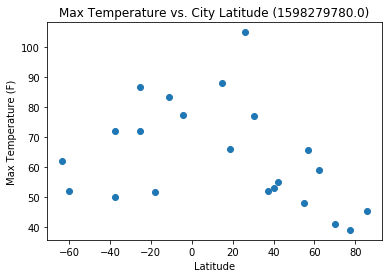

In [26]:
x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Max Temp"]
date = cleaned_weather_df.iloc[0,8]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Max Temperature vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.savefig("Images/temp_vs_lat.png")

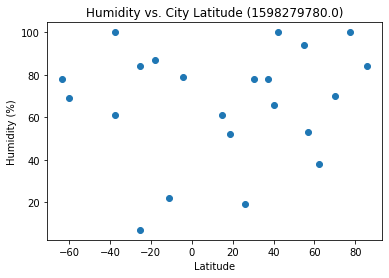

In [27]:
x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Humidity vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("Images/hum_vs_lat.png")

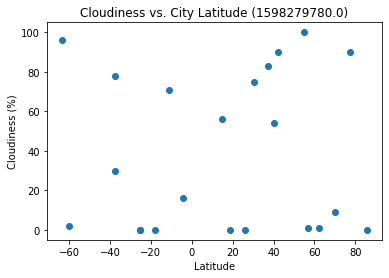

In [28]:
x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Cloudiness vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("Images/cloud_vs_lat.png")

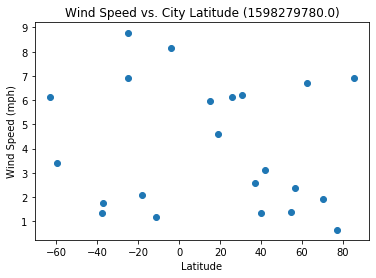

In [29]:
x_values = cleaned_weather_df["Lat"]
y_values = cleaned_weather_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.title(f"Wind Speed vs. City Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("Images/wind_vs_lat.png")

In [30]:
northern_hemi_df = cleaned_weather_df.loc[cleaned_weather_df["Lat"]>0]
southern_hemi_df = cleaned_weather_df.loc[cleaned_weather_df["Lat"]<0]

r value: 0.5492354210209757


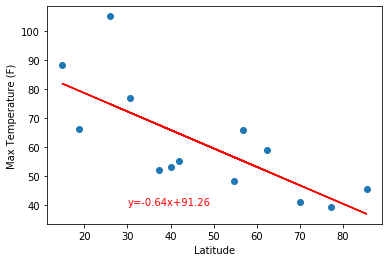

In [31]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_temp_vs_lat.png")

r value: 0.28324979153610036


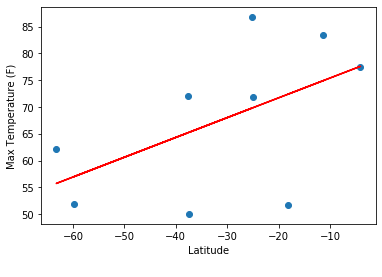

In [32]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

temp_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_temp_vs_lat.png")

r value: 0.15025699877087867


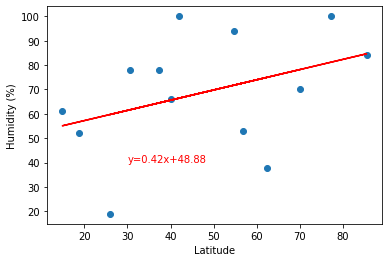

In [33]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,40),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_hum_vs_lat.png")

r value: 0.05169179380564695


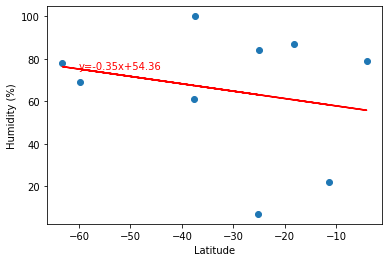

In [34]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

hum_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,75),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_hum_vs_lat.png")

r value: 0.01068382321901751


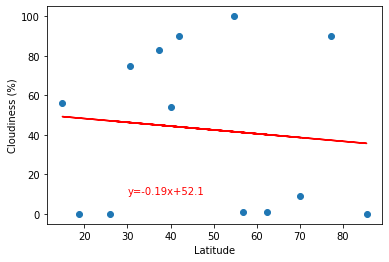

In [35]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,10),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_cloud_vs_lat.png")

r value: 0.09588207816524968


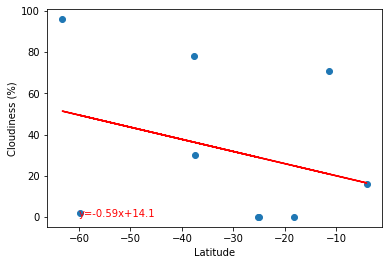

In [36]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

cloud_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,0),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_cloud_vs_lat.png")

r value: 0.06210470634111538


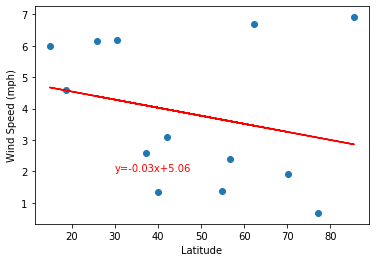

In [37]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (30,2),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/n_wind_vs_lat.png")

r value: 0.013979579666822473


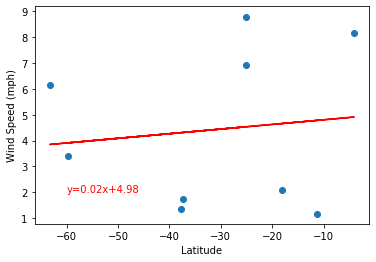

In [38]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

wind_vs_lat = plt.scatter(x_values,y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

(slope, intercept, r, p, sem) = linregress(x_values, y_values)
fit = slope * x_values + intercept
line_eq = f"y={round(slope,2)}x+{round(intercept,2)}"
plt.plot(x_values,fit,"-r")
plt.annotate(line_eq, (-60,2),color="red")
print(f"r value: {r**2}")

plt.savefig("Images/s_wind_vs_lat.png")